<a href="https://colab.research.google.com/github/hyperkraz/MAT421/blob/main/HW11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HW11**

***Problem 1***

In [22]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from functools import partial
plt.style.use('seaborn-poster')

%matplotlib inline

def my_logistics_eq(t, P, r, K):
  dP = r*P*(1 - (P / K))
  return dP

dP = my_logistics_eq(0, 10, 1.1, 15)
dP

3.666666666666667

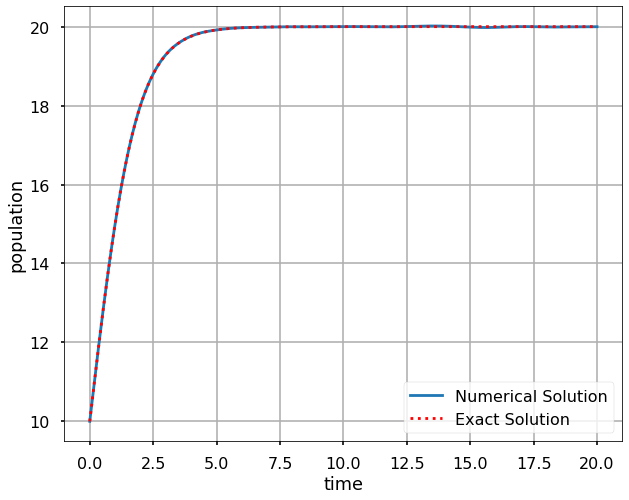

In [23]:

t0 = 0
tf = 20
P0 = 10
r = 1.1
K = 20
t = np.linspace(0, 20, 2001)

f = partial(my_logistics_eq, r=r, K=K)
sol=solve_ivp(f,[t0,tf],[P0],t_eval=t)

plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.plot(t, \
  K*P0*np.exp(r*t)/(K+P0*(np.exp(r*t)-1)),'r:')
plt.xlabel('time')
plt.ylabel('population')

plt.legend(['Numerical Solution', \
            'Exact Solution'])
plt.grid(True)
plt.show()

***Problem 2***

In [24]:
import numpy as np

def my_lorenz(t, S, sigma, rho, beta):
  if (sigma<0) or (rho<0) or (beta<0):
    raise BaseException("Error : beta, rho, and sigma must be nonnegative.")
  dS = np.zeros(3)
  dS[0] = sigma*(S[1]-S[0])
  dS[1] = (S[0]*(rho-S[2]))-S[1]
  dS[2] = (S[0]*S[1])-(beta*S[2]);
  return dS

s = np.array([1, 2, 3])
dS = my_lorenz(0, s, 10, 28, 8/3)
dS

array([10., 23., -6.])

***Problem 3***

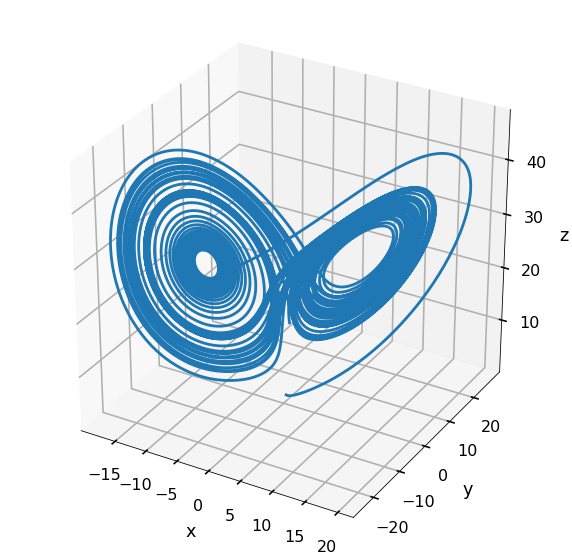

In [25]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def my_lorenz_solver(t_span, s0, sigma, rho, beta):
  s = np.array([1,2,3])
  dS = my_lorenz(0,s,10,28,(8/3))
  from functools import partial
  t0 = t_span[0]
  t1 = t_span[1]
  t = np.linspace(t0,tf,20001)
  f = partial(my_lorenz,sigma=sigma,beta=beta,rho=rho)

  sol = solve_ivp(f,t_span,s0,t_eval=t)
  T, X, Y, Z = sol.t, sol.y[0,:], sol.y[1,:], sol.y[2,:]
  return [T, X, Y, Z]

sigma = 10
rho = 28
beta = 8/3
t0 = 0
tf = 50
s0 = np.array([0, 1, 1.05])

[T, X, Y, Z] = my_lorenz_solver([t0, tf], \
                        s0, sigma, rho, beta)

from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.plot3D(X, Y, Z)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

plt.show()